## Importing Required Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load the dataset intoa pandas dataframe. Name the variable as “survey”.


In [2]:
# Task 1
survey = pd.read_excel("Sample Survey (2).xlsx",sheet_name = "Data")

In [3]:
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505


In [4]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6867 entries, 0 to 6866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   response_id       6867 non-null   int64         
 1   collection_date   6867 non-null   datetime64[ns]
 2   urban_rural       6867 non-null   object        
 3   education         6867 non-null   object        
 4   income            6867 non-null   object        
 5   Vote_Now          6867 non-null   object        
 6   Past_Vote         6867 non-null   object        
 7   CM_satisfaction   6867 non-null   object        
 8   MLA_satisfaction  6867 non-null   object        
 9   age               6867 non-null   object        
 10  gender            6867 non-null   object        
 11  assembly_no       6867 non-null   int64         
 12  category          6867 non-null   object        
 13  weight            6867 non-null   float64       
dtypes: datetime64[ns](1), fl

In [5]:
survey['age'].replace('24ko', 24, inplace = True)

In [6]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6867 entries, 0 to 6866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   response_id       6867 non-null   int64         
 1   collection_date   6867 non-null   datetime64[ns]
 2   urban_rural       6867 non-null   object        
 3   education         6867 non-null   object        
 4   income            6867 non-null   object        
 5   Vote_Now          6867 non-null   object        
 6   Past_Vote         6867 non-null   object        
 7   CM_satisfaction   6867 non-null   object        
 8   MLA_satisfaction  6867 non-null   object        
 9   age               6867 non-null   int64         
 10  gender            6867 non-null   object        
 11  assembly_no       6867 non-null   int64         
 12  category          6867 non-null   object        
 13  weight            6867 non-null   float64       
dtypes: datetime64[ns](1), fl

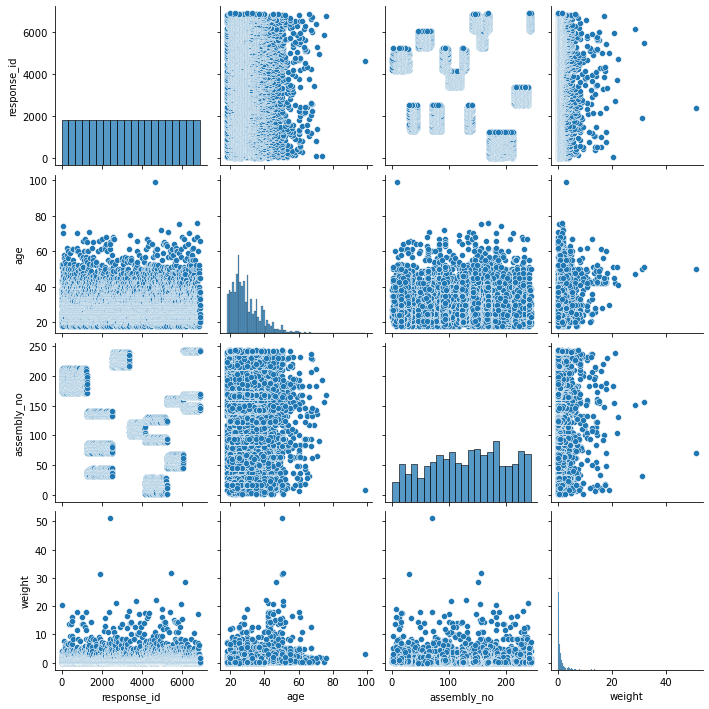

In [7]:
sns.pairplot(survey)

### 2. How many samples were collected on each day?


In [8]:
# Task 2
df = survey[["response_id","collection_date"]]

In [9]:
df

,response_id,collection_date
0,1,2020-08-24
1,2,2020-08-24
2,3,2020-08-24
3,4,2020-08-24
4,5,2020-08-24
...,...,...
6862,6863,2020-09-01
6863,6864,2020-09-01
6864,6865,2020-09-01
6865,6866,2020-09-01


In [10]:
df["year"] = df["collection_date"].dt.year
df["month"] = df["collection_date"].dt.month
df["day"] = df["collection_date"].dt.day
df

<ipython-input-10-423faf716e33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year"] = df["collection_date"].dt.year
<ipython-input-10-423faf716e33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["month"] = df["collection_date"].dt.month
<ipython-input-10-423faf716e33>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,response_id,collection_date,year,month,day
0,1,2020-08-24,2020,8,24
1,2,2020-08-24,2020,8,24
2,3,2020-08-24,2020,8,24
3,4,2020-08-24,2020,8,24
4,5,2020-08-24,2020,8,24
...,...,...,...,...,...
6862,6863,2020-09-01,2020,9,1
6863,6864,2020-09-01,2020,9,1
6864,6865,2020-09-01,2020,9,1
6865,6866,2020-09-01,2020,9,1


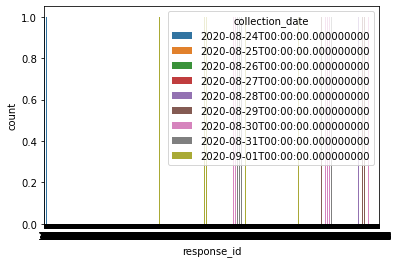

In [12]:
sns.countplot(x = "response_id", hue = "collection_date", data = df)
plt.show()

In [13]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6867 entries, 0 to 6866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   response_id       6867 non-null   int64         
 1   collection_date   6867 non-null   datetime64[ns]
 2   urban_rural       6867 non-null   object        
 3   education         6867 non-null   object        
 4   income            6867 non-null   object        
 5   Vote_Now          6867 non-null   object        
 6   Past_Vote         6867 non-null   object        
 7   CM_satisfaction   6867 non-null   object        
 8   MLA_satisfaction  6867 non-null   object        
 9   age               6867 non-null   int64         
 10  gender            6867 non-null   object        
 11  assembly_no       6867 non-null   int64         
 12  category          6867 non-null   object        
 13  weight            6867 non-null   float64       
dtypes: datetime64[ns](1), fl

In [14]:
# we are not able to identify the no of samples per day 
#because here in "df" one column is of "int" and the other column is of "datetime" format

(array([1479.,  998.,  598.,  665.,    0.,  761.,  620.,  582.,  557.,
         607.]),
 array([18498. , 18498.8, 18499.6, 18500.4, 18501.2, 18502. , 18502.8,
        18503.6, 18504.4, 18505.2, 18506. ]),
 <BarContainer object of 10 artists>)

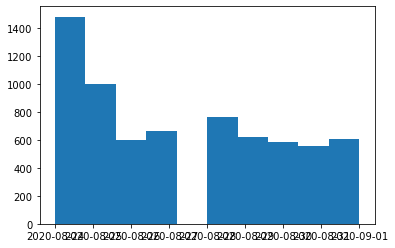

In [15]:
df1 = df["collection_date"]
plt.hist(df1)

In [16]:
survey['collection_date'].value_counts()

2020-08-24    1479
2020-08-25     998
2020-08-28     761
2020-08-27     665
2020-08-29     620
2020-09-01     607
2020-08-26     598
2020-08-30     582
2020-08-31     557
Name: collection_date, dtype: int64

### 3. What proportion of the total respondents were aged less than 45?

In [17]:
# Task 3
proportion = len(survey[survey['age'] < 45]) / len(survey)
proportion  # this will show the proportion of the whole sample space that is less than 45

0.9318479685452162

### 4. Create a new column in the dataframe “age_group”. This column should contain the age group the respondent belongs to. The age groups are 18-25, 25-40, 40-55 and 55+.

In [18]:
# Task 4
# Here we are going to create a dataframe with new column of age_group and bin it 

In [20]:
ml1 = list(range(18,26))
mydict1 = dict.fromkeys(ml1, '18-25')

ml2 = list(range(25,41))
mydict2 = dict.fromkeys(ml2, '25-40')

ml3 = list(range(40,56))
mydict3 = dict.fromkeys(ml1, '40-55')

ml4 = list(range(55,100))
mydict4 = dict.fromkeys(ml1, '55+')


mydict1.update(mydict2)
mydict1.update(mydict3)
mydict1.update(mydict4)

survey['age_group'] = survey['age'].map(mydict1)

In [21]:
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,25-40
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,25-40
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762,55+
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298,25-40
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505,55+


In [22]:
New_df = pd.DataFrame([18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,74,75,76,99], columns=['age'])

bins= [18,25,40,50,60,70,80,100]
labels = ['18-25', '25-40', '40-55', '55-65','65-70','70-99','100+']
New_df['age_group'] = pd.cut(New_df.age, bins, labels = labels,include_lowest = True)
print(New_df) 

    age age_group
0    18     18-25
1    19     18-25
2    20     18-25
3    21     18-25
4    22     18-25
5    23     18-25
6    24     18-25
7    25     18-25
8    26     25-40
9    27     25-40
10   28     25-40
11   29     25-40
12   30     25-40
13   31     25-40
14   32     25-40
15   33     25-40
16   34     25-40
17   35     25-40
18   36     25-40
19   37     25-40
20   38     25-40
21   39     25-40
22   40     25-40
23   41     40-55
24   42     40-55
25   43     40-55
26   44     40-55
27   45     40-55
28   46     40-55
29   47     40-55
30   48     40-55
31   49     40-55
32   50     40-55
33   51     55-65
34   52     55-65
35   53     55-65
36   54     55-65
37   55     55-65
38   56     55-65
39   57     55-65
40   58     55-65
41   59     55-65
42   60     55-65
43   61     65-70
44   62     65-70
45   63     65-70
46   64     65-70
47   65     65-70
48   66     65-70
49   67     65-70
50   68     65-70
51   69     65-70
52   70     65-70
53   71     70-99
54   72   

### 5. How many samples were collected for each age-group? Which age-group had the most samples?

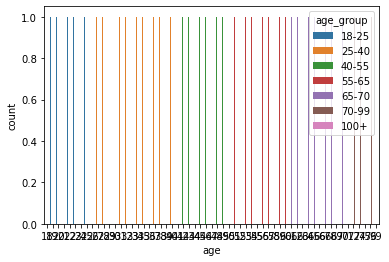

In [23]:
# Task_5

sns.countplot(x="age",hue="age_group",data = New_df)
plt.show()

In [24]:
#From the above plot we say that age_group of "25-40" that is "Orange Color" that has the high range of ages.
# And when apply value counts fuction we will get like below one 

New_df['age_group'].value_counts() ## 25-40 age_group

25-40    15
40-55    10
55-65    10
65-70    10
18-25     8
70-99     5
100+      1
Name: age_group, dtype: int64

### 6. What proportion of the respondents had opted for the RJD party in both the Vote_Now and the Past_Vote questions?

In [25]:
# Task-6
proportion=len(survey[(survey['Vote_Now']=='RJD')  & (survey['Past_Vote']=='RJD')])/len(survey)

# We need to calculate the percentage of responded for RJD in the both times.
print('There are {}% RJD in both the elections vote_now and past_vote'.format(proportion*100))

There are 11.810106305519149% RJD in both the elections vote_now and past_vote


### 7. For each day of sample collection, determine the proportion of respondents who were fully satisfied with the performance of the CM. So if there were a total of 1000 samples on day 1 and 300 out of those said they were fully satisfied, then our answer for that day would be 0.3.

In [26]:
# Task-7
survey.groupby(by='collection_date')[['CM_satisfaction']].apply(lambda x:np.sum(x=='Fully Satisfied')/len(x)*100)

,CM_satisfaction
collection_date,
2020-08-24,9.871535
2020-08-25,9.519038
2020-08-26,9.866221
2020-08-27,8.120301
2020-08-28,12.089356
2020-08-29,11.774194
2020-08-30,11.168385
2020-08-31,11.131059
2020-09-01,12.355848


### 8. In a similar fashion create a day-wise proportion of respondents that opted fully dissatisfied with their MLA. Create a line plot of the result with date on x-axis and proportions on the y-axis

                 MLA_satisfaction
collection_date                  
2020-08-24              59.972955
2020-08-25              63.126253
2020-08-26              59.030100
2020-08-27              60.601504
2020-08-28              60.709593
2020-08-29              56.451613
2020-08-30              62.027491
2020-08-31              57.630162
2020-09-01              63.426689


<AxesSubplot:xlabel='collection_date'>

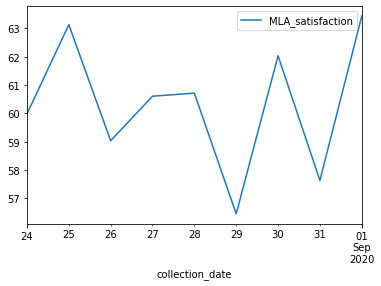

In [27]:
# Task_8
# We need to import datetime library for line plot....

Dis_table = pd.DataFrame(survey.groupby(by='collection_date')[['MLA_satisfaction']].apply(lambda x:np.sum(x=='Fully Dissatisfied')/len(x)*100))

print(Dis_table)

import datetime
Dis_table.index.date
Dis_table.plot()

### 9. Create a pivot-table (or crosstab) with index as Past_Vote, Column as Vote_Now and cell values as the count of samples.

In [28]:
# Task-9
pd.pivot_table(data=survey,index='Past_Vote',columns='Vote_Now',aggfunc='count',values='response_id')

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,7.0,1.0,1630.0,3.0,5.0,42.0,101.0,110.0,44.0,13.0,194.0,32.0,87.0,370.0,88.0,24.0,62.0,10.0
BSP,NaN,1.0,2.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Did not vote,8.0,5.0,231.0,2.0,1.0,22.0,41.0,69.0,10.0,16.0,83.0,11.0,51.0,195.0,20.0,3.0,31.0,5.0
HAM,2.0,NaN,25.0,NaN,1.0,NaN,3.0,2.0,2.0,NaN,4.0,NaN,NaN,6.0,4.0,NaN,1.0,NaN
INC,NaN,6.0,6.0,NaN,NaN,57.0,10.0,9.0,NaN,3.0,6.0,3.0,3.0,100.0,1.0,2.0,7.0,NaN
JAP(L),NaN,NaN,4.0,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN
JD(U),6.0,10.0,254.0,2.0,2.0,45.0,72.0,279.0,29.0,9.0,90.0,18.0,43.0,435.0,13.0,25.0,36.0,6.0
LJP,NaN,NaN,76.0,1.0,NaN,4.0,3.0,6.0,9.0,2.0,3.0,NaN,2.0,17.0,1.0,NaN,1.0,NaN
Left Front,NaN,1.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,18.0,1.0,1.0,NaN,4.0,NaN,1.0,NaN,1.0


### 10. Repeat the above question with the cell values as the sum of “weight”.


In [29]:
# Task_10 
pd.pivot_table(data=survey,index='Past_Vote',columns='Vote_Now',aggfunc='sum',values='weight')

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,4.807335,0.349996,1049.344112,0.452551,10.171283,50.055502,63.832368,68.029581,45.716215,7.537394,114.913686,8.790137,50.016163,250.948101,16.047570,18.715113,41.286954,18.691691
BSP,NaN,1.654731,5.174487,32.010277,NaN,2.298223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Did not vote,8.865896,5.379527,114.203906,3.329611,2.497170,27.791290,26.359190,58.983458,11.801813,13.050113,44.725179,7.289933,25.319524,173.882525,4.349832,5.041587,22.015457,10.696552
HAM,0.312607,NaN,25.348884,NaN,1.648856,NaN,0.712161,1.006719,2.496424,NaN,0.928984,NaN,NaN,7.713008,1.903148,NaN,0.039564,NaN
INC,NaN,11.105958,1.642875,NaN,NaN,161.742302,18.942597,11.077323,NaN,6.268726,5.999014,1.552038,1.588527,195.020050,5.340403,1.140299,8.558475,NaN
JAP(L),NaN,NaN,6.512846,NaN,NaN,NaN,57.876224,NaN,NaN,NaN,NaN,3.195682,NaN,2.164824,NaN,NaN,NaN,NaN
JD(U),12.457216,29.198610,156.243100,11.005903,2.639574,91.806261,106.217216,498.796862,33.148113,11.765603,61.109706,29.196072,45.175289,657.155514,4.015909,44.376194,58.137833,20.675288
LJP,NaN,NaN,85.010450,2.481377,NaN,21.613385,7.375946,11.382812,26.868529,1.712452,0.813171,NaN,1.927965,30.737989,0.478933,NaN,1.709409,NaN
Left Front,NaN,2.298223,0.209586,NaN,NaN,2.291368,NaN,NaN,NaN,44.280864,0.201455,8.309203,NaN,6.740281,NaN,0.877960,NaN,3.020887


### 11. Create a dataframe by performing a group by over age_group and calculate the count of total samples under each age_group.


In [30]:
# Task-11
df4=pd.DataFrame(survey.groupby(by="age_group")["response_id"].agg("count"))
print(df4)

           response_id
age_group             
25-40             3423
55+               2692


### 12. Create a dataframe by performing a group by over age_group and finding the count of total samples for each age_group that opted for the JD(U) party in Vote_Now.


In [31]:
#Task-12
df5=pd.DataFrame(survey.groupby(by="age_group")["Vote_Now"].apply(lambda x:np.sum(x=="JD(U)")))
print(df5)

           Vote_Now
age_group          
25-40           245
55+             216


### 13. Join/Merge the two dataframes from questions 12 and 11 with the common column as age_group

In [32]:
### Task-13.

df_inner = pd.merge(df4, df5, on='age_group', how='inner')
df_inner

,response_id,Vote_Now
age_group,,
25-40,3423,245
55+,2692,216
